# 1. Data Visualization

In [2]:
# Import pandas
import pandas as pd

In [3]:
#import dataset
filepath = "../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv"

obesity = pd.read_csv(filepath)

In [4]:
#data Exploration
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#group count of gender column
obesity.Gender.value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [6]:
#count family_history_with
obesity.family_history_with_overweight.value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [7]:
obesity.CAEC.value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [8]:
obesity.SMOKE.value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [9]:
obesity.SCC.value_counts()

SCC
no     2015
yes      96
Name: count, dtype: int64

In [10]:
obesity.CALC.value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [11]:
obesity.MTRANS.value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [12]:
obesity.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [13]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# 2. Data Analysis

## 2.1. Import libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 2.2. Map target label

In [15]:
# converting target column from categorical to an integer column
label_encoder = LabelEncoder()
obesity['target_encoded'] = label_encoder.fit_transform(obesity['NObeyesdad'])

In [16]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,target_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6


## 2.3. Define features and target

In [17]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [18]:
X = obesity.drop(columns=['NObeyesdad','target_encoded'])
y = obesity['NObeyesdad']


categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

## 2.4. Divide to train test dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2.5 Create preprocessing data pipeline

In [20]:
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## 2.6. Model pipeline

In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

## 2.7. Train the modelcwith train dataset

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## 2.8. Evaluate the model with test dataset

In [23]:
y_pred = model.predict(X_test)

## 2.9  Confusion matrix as metrics for accuracy, f1, recall, precision

In [24]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.83      0.76      0.79        58
     Obesity_Type_I       0.88      0.93      0.90        70
    Obesity_Type_II       0.95      0.97      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.74      0.74      0.74        58
Overweight_Level_II       0.80      0.76      0.78        58

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.88      0.88      0.88       423


 Confusion Matrix:
[[54  0  0  0  0  0  0]
 [ 4 44  0  0  0 10  0]
 [ 0  0 65  2  0  0  3]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  7  0  0  0 43  8]
 [ 0  2  7  0  0  5 44]]


In [25]:
# Accuracy is 88% and confussion matrix is near accurate as most of the frequencies are on the diagonal cells.
# Also note that F-1 values for Obesity_type_I-III are quite high, including Insufficient_weight.

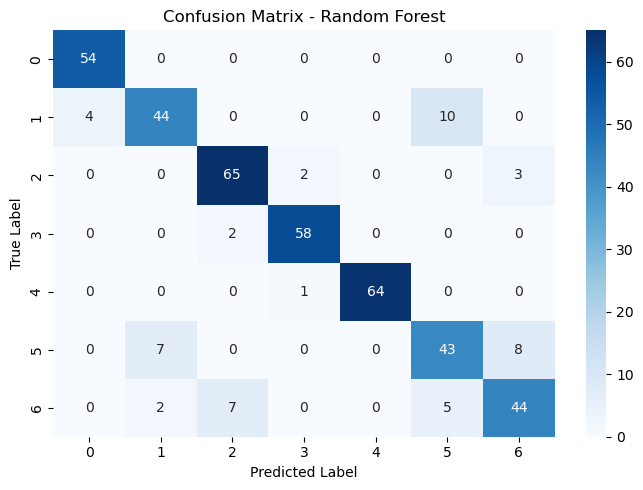

In [26]:

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [27]:
import shap
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data_transform = model.named_steps['preprocessor'].transform(X_test)

explainer = shap.Explainer(
    model.named_steps['classifier'], 
    data_transform,
    feature_names = model.named_steps['preprocessor'].get_feature_names_out())

shap_values = explainer(data_transform)





c:\Users\Mo\miniconda3\envs\dsi_participant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
model.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

## Insufficient_Weight -- Class index 0
## Normal_Weight       -- Class index 1
## Obesity_Type_I      -- Class index 2 
## Obesity_Type_II     -- Class index 3
## Obesity_Type_III    -- Class index 4
## Overweight_Level_I  -- Class index 5
## Overweight_Level_II -- Class index 6   

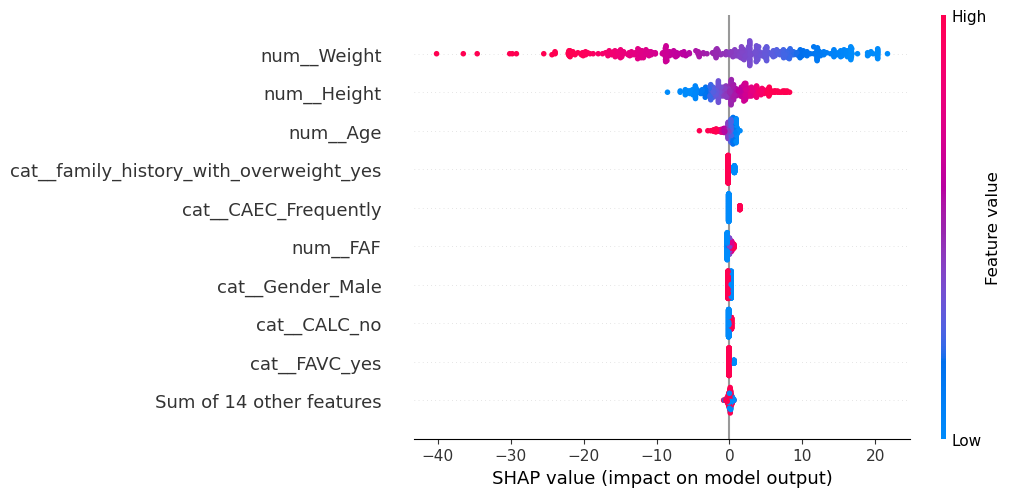

In [29]:
shap.plots.beeswarm(shap_values[:,:,0])

Top 3 important features for Insufficient_Weight are : Weight, Height and Age

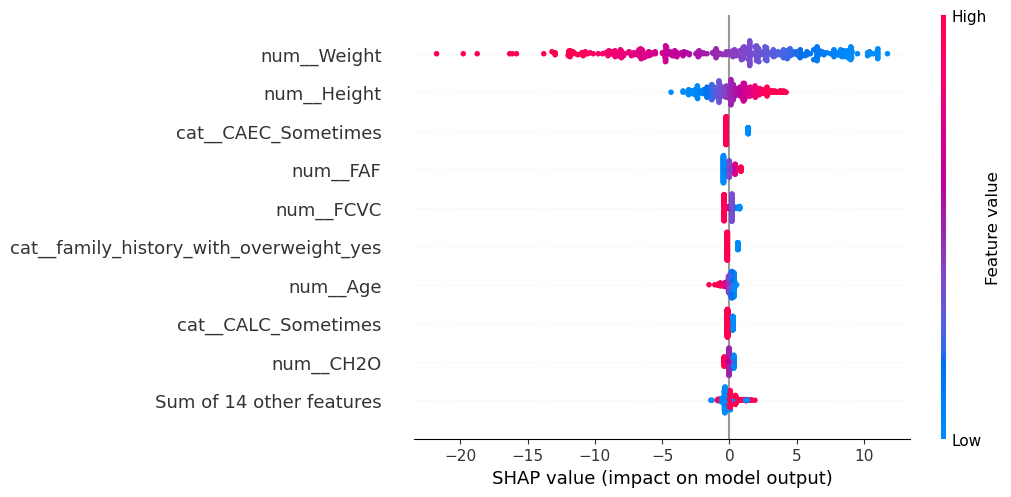

In [30]:
shap.plots.beeswarm(shap_values[:,:,1])

Top 3 important features for Normal_Weight are : Weight, Height and CAEC_sometimes

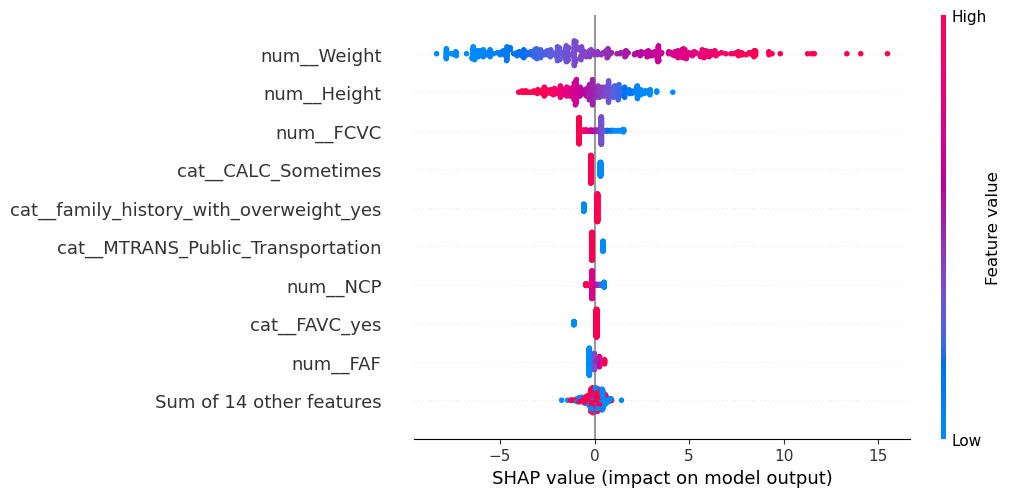

In [31]:
shap.plots.beeswarm(shap_values[:,:,2])

Top 3 important features for Obesity_Type_I are : Weight, Height and FCVC

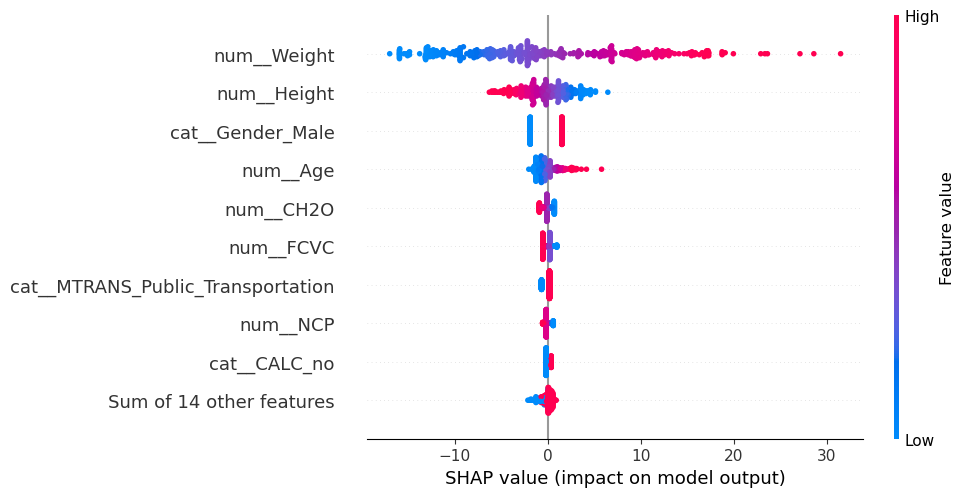

In [32]:
shap.plots.beeswarm(shap_values[:,:,3])

Top 3 important features for Obesity_Type_II are : Weight, Height and Gender_Male

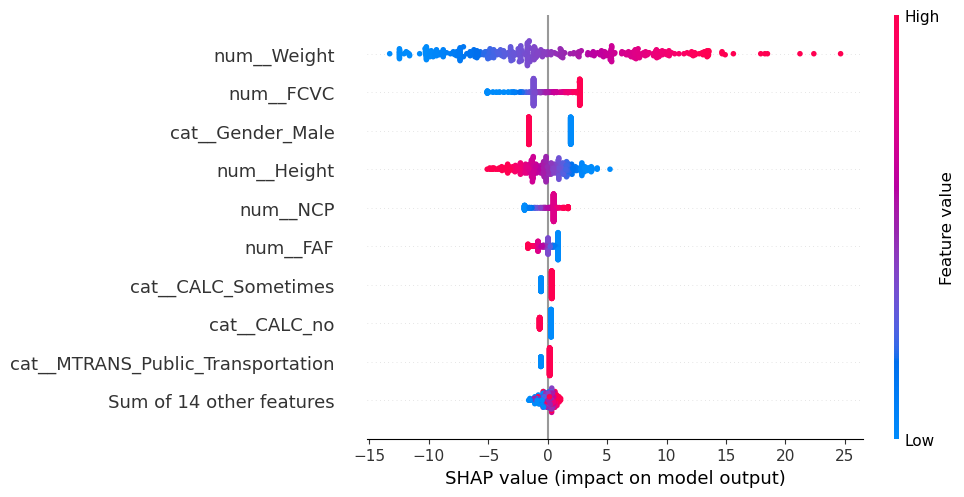

In [33]:
shap.plots.beeswarm(shap_values[:,:,4])

Top 3 important features for Obesity_Type_III are : Weight, FCVC and Gender_Male

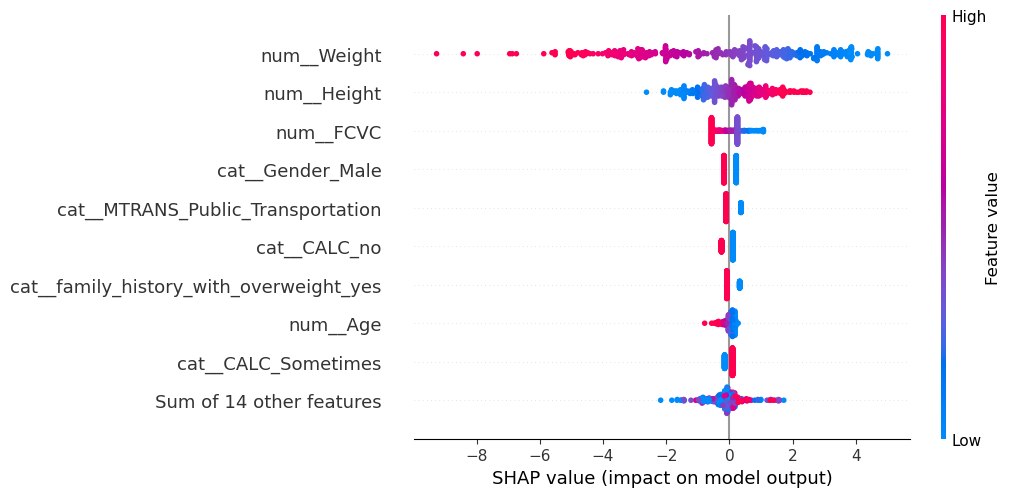

In [34]:
shap.plots.beeswarm(shap_values[:,:,5])

Top 3 important features for Overweight_Level_I are : Weight, Height and FCVC

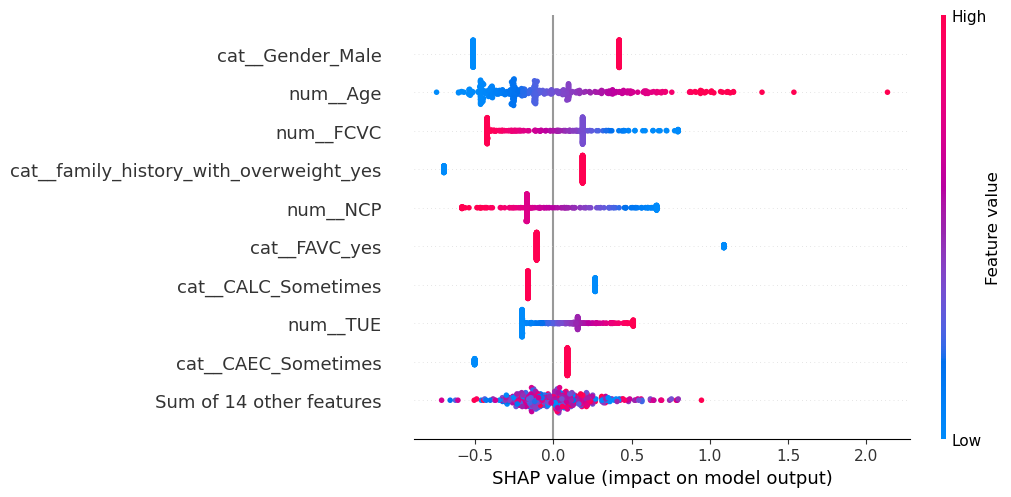

In [35]:
shap.plots.beeswarm(shap_values[:,:,6])

Top 3 important features for Overweight_Level_II are : Gender_Male, Age and FCVC  

In [36]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set publication-grade plot parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 11
rcParams['axes.titlesize'] = 12
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['figure.dpi'] = 300

In [37]:
class_names = [
    'Underweight',
    'Healthy', 
    'Overweight L1',
    'Overweight L2',
    'Obesity L1',
    'Obesity L2',
    'Obesity L3'
]

In [38]:
# Step 1: Transform the data and get feature names
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)

# Get feature names after transformation
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 
                       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Get categorical feature names after one-hot encoding
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = numerical_features + list(cat_feature_names)

# Convert to DataFrame for better handling
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

print(f"Total features after transformation: {len(feature_names)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features (after encoding): {len(cat_feature_names)}")

# Step 2: Create SHAP explainer
# For multiclass logistic regression, we use LinearExplainer directly with the model
print("\nCalculating SHAP values...")

Total features after transformation: 23
Numerical features: 8
Categorical features (after encoding): 15

Calculating SHAP values...


### 2.10.4. Multi class logistic regression

In [39]:
# Get the classifier
classifier = model.named_steps['classifier']

# For multiclass logistic regression, use a subset of training data as background
# Usingmasker for proper handling
background_data = shap.maskers.Independent(X_train_df, max_samples=100)

# Create LinearExplainer 
explainer = shap.LinearExplainer(classifier, background_data, feature_perturbation="interventional")

# Calculate SHAP values for test set
# This returns a list of length n_classes, each with shape (n_samples, n_features)
shap_values_raw = explainer.shap_values(X_test_df)

# Check what we got
print(f"Type of shap_values_raw: {type(shap_values_raw)}")
if isinstance(shap_values_raw, list):
    print(f"List length: {len(shap_values_raw)}")
    print(f"First element shape: {shap_values_raw[0].shape}")
    shap_values_list = shap_values_raw
elif isinstance(shap_values_raw, np.ndarray):
    print(f"Array shape: {shap_values_raw.shape}")
    # If it's (n_samples, n_features, n_classes), split it
    if len(shap_values_raw.shape) == 3:
        shap_values_list = [shap_values_raw[:, :, i] for i in range(shap_values_raw.shape[2])]
    # If it's (n_features, n_classes), transpose and split
    elif shap_values_raw.shape[0] == len(feature_names) and shap_values_raw.shape[1] == 7:
        # This means we got (n_features, n_classes) but need (n_samples, n_features) per class
        # Recalculate properly
        print("Recalculating with correct format...")
        explainer = shap.LinearExplainer(classifier, X_train_df.iloc[:100])
        shap_values_list = explainer.shap_values(X_test_df)
        print(f"After recalculation - List length: {len(shap_values_list)}, shape: {shap_values_list[0].shape}")
else:
    raise ValueError(f"Unexpected SHAP values type: {type(shap_values_raw)}")

print(f"Final format: {len(shap_values_list)} classes, each with shape {shap_values_list[0].shape}")

Type of shap_values_raw: <class 'numpy.ndarray'>
Array shape: (423, 23, 7)
Final format: 7 classes, each with shape (423, 23)


c:\Users\Mo\miniconda3\envs\dsi_participant\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


### 2.10.5. Global feature importance


GENERATING GLOBAL FEATURE IMPORTANCE PLOTS


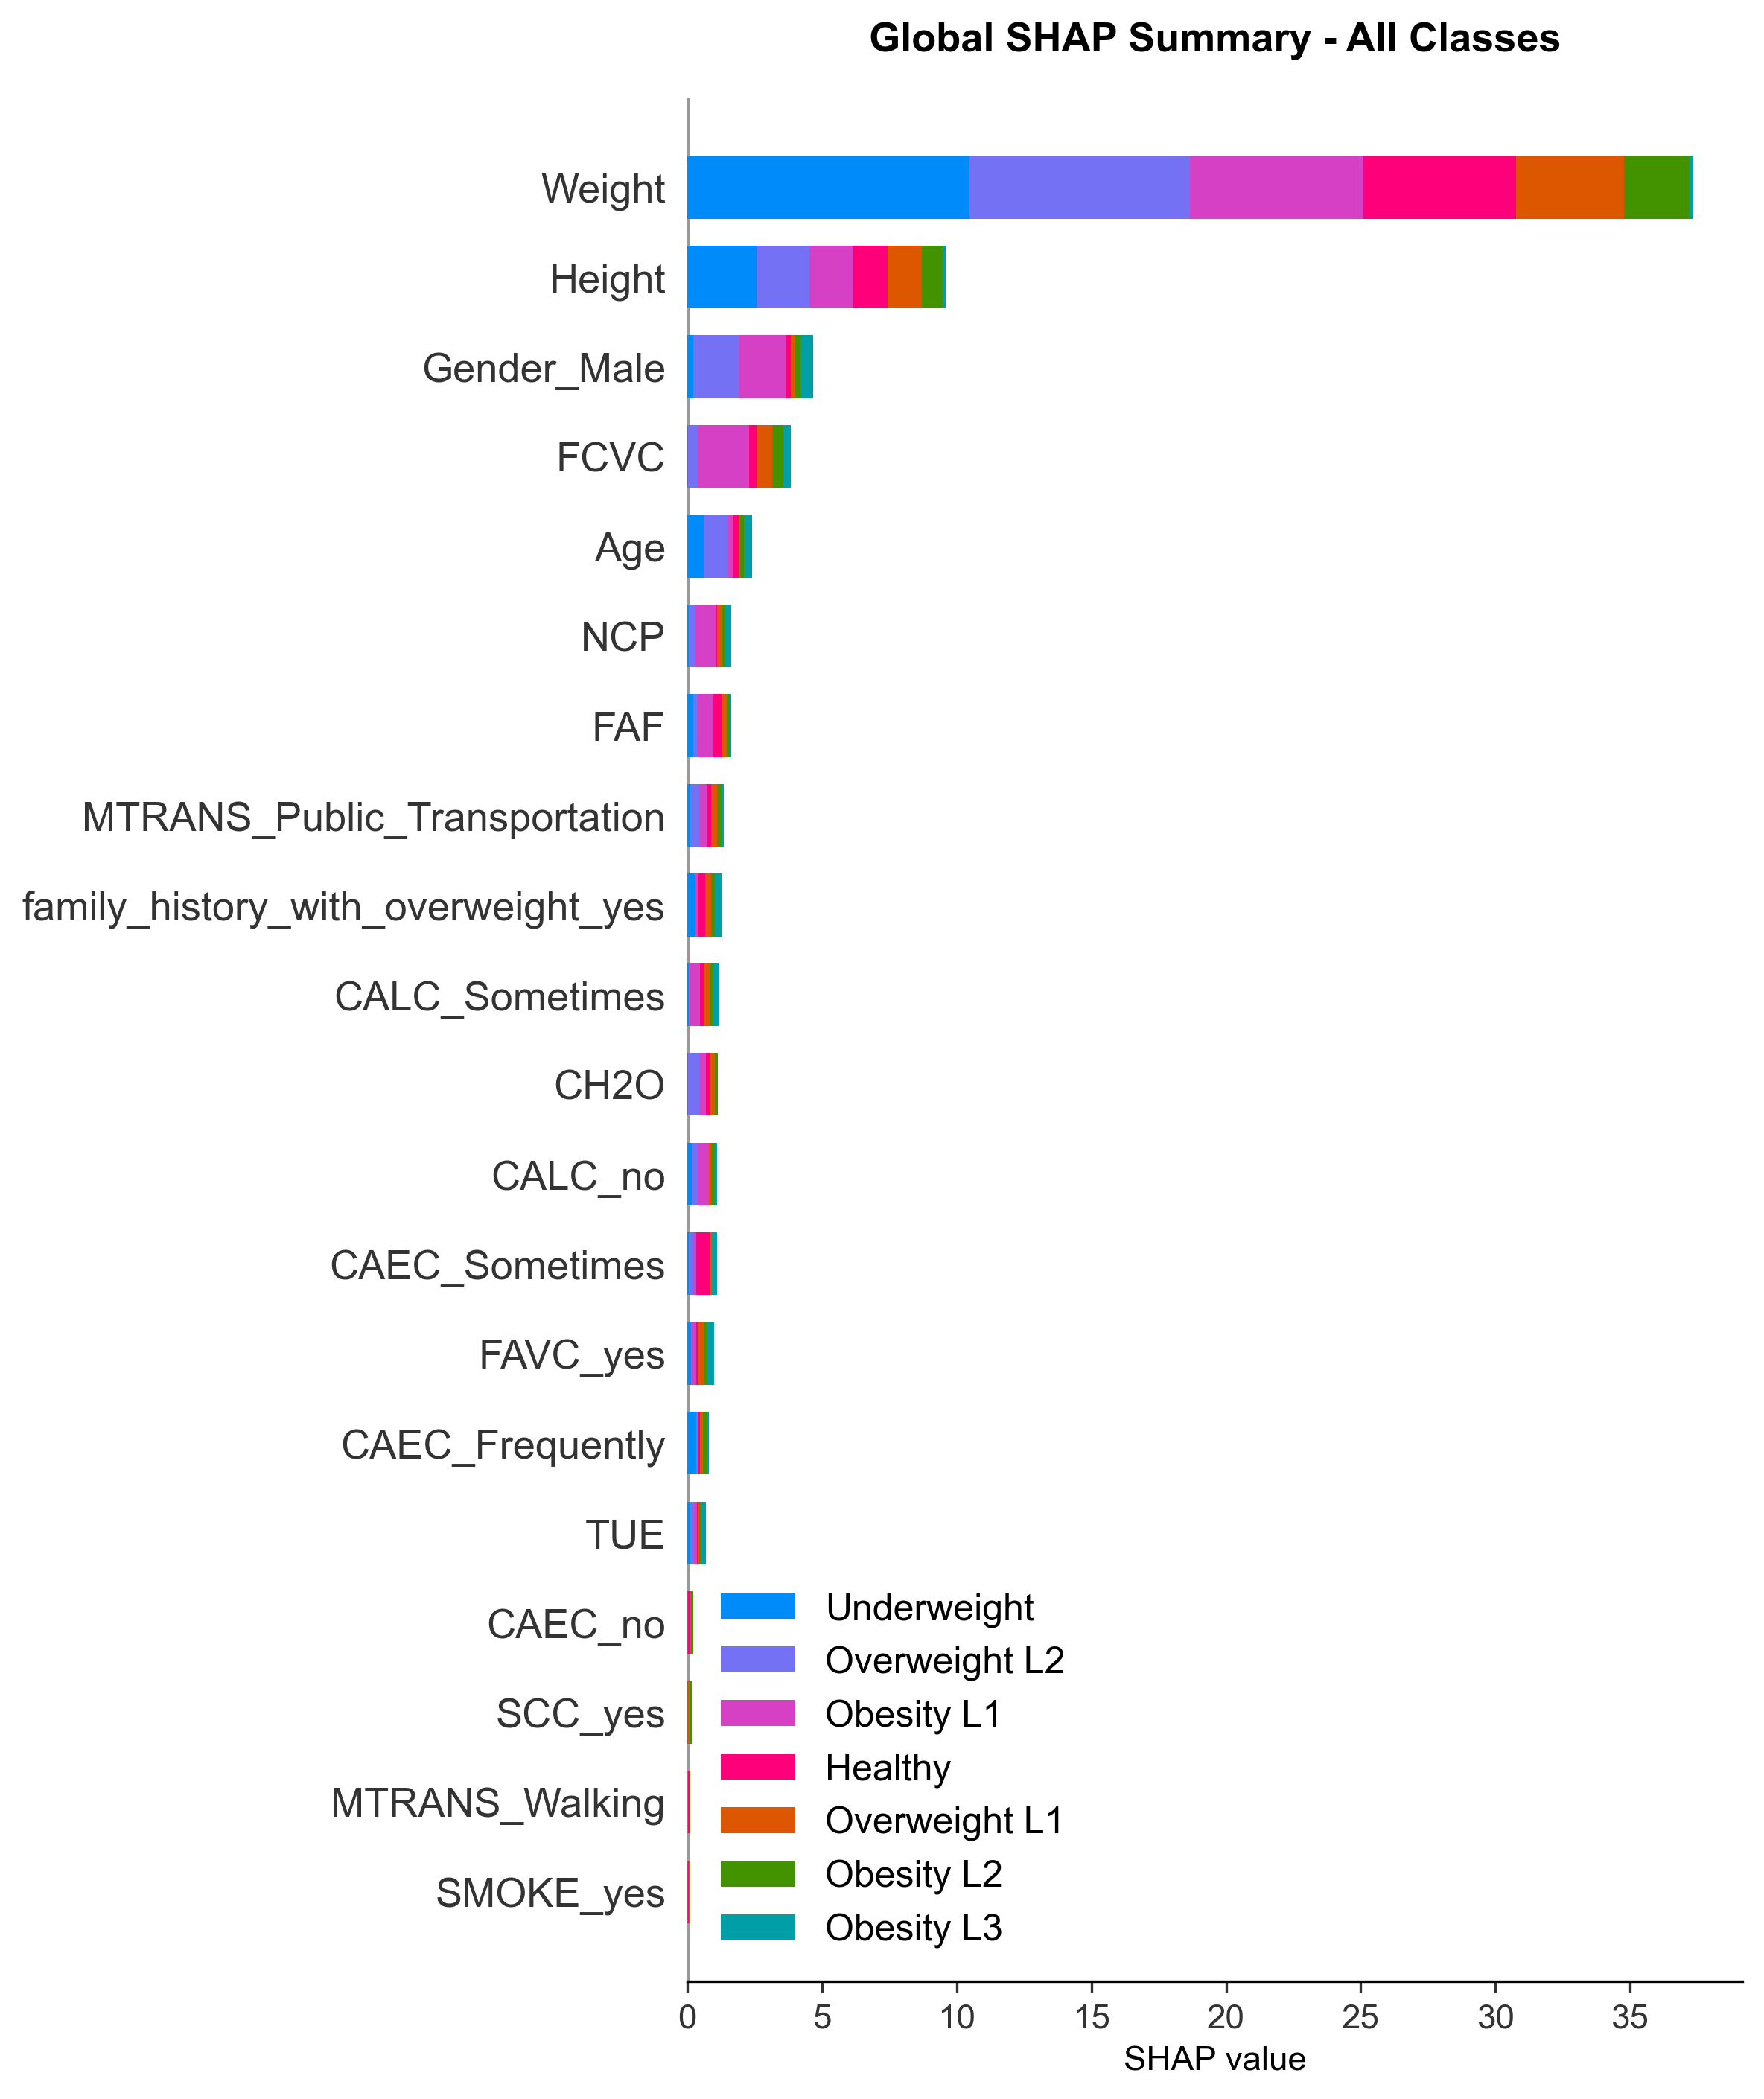

✓ Saved: shap_global_summary.png


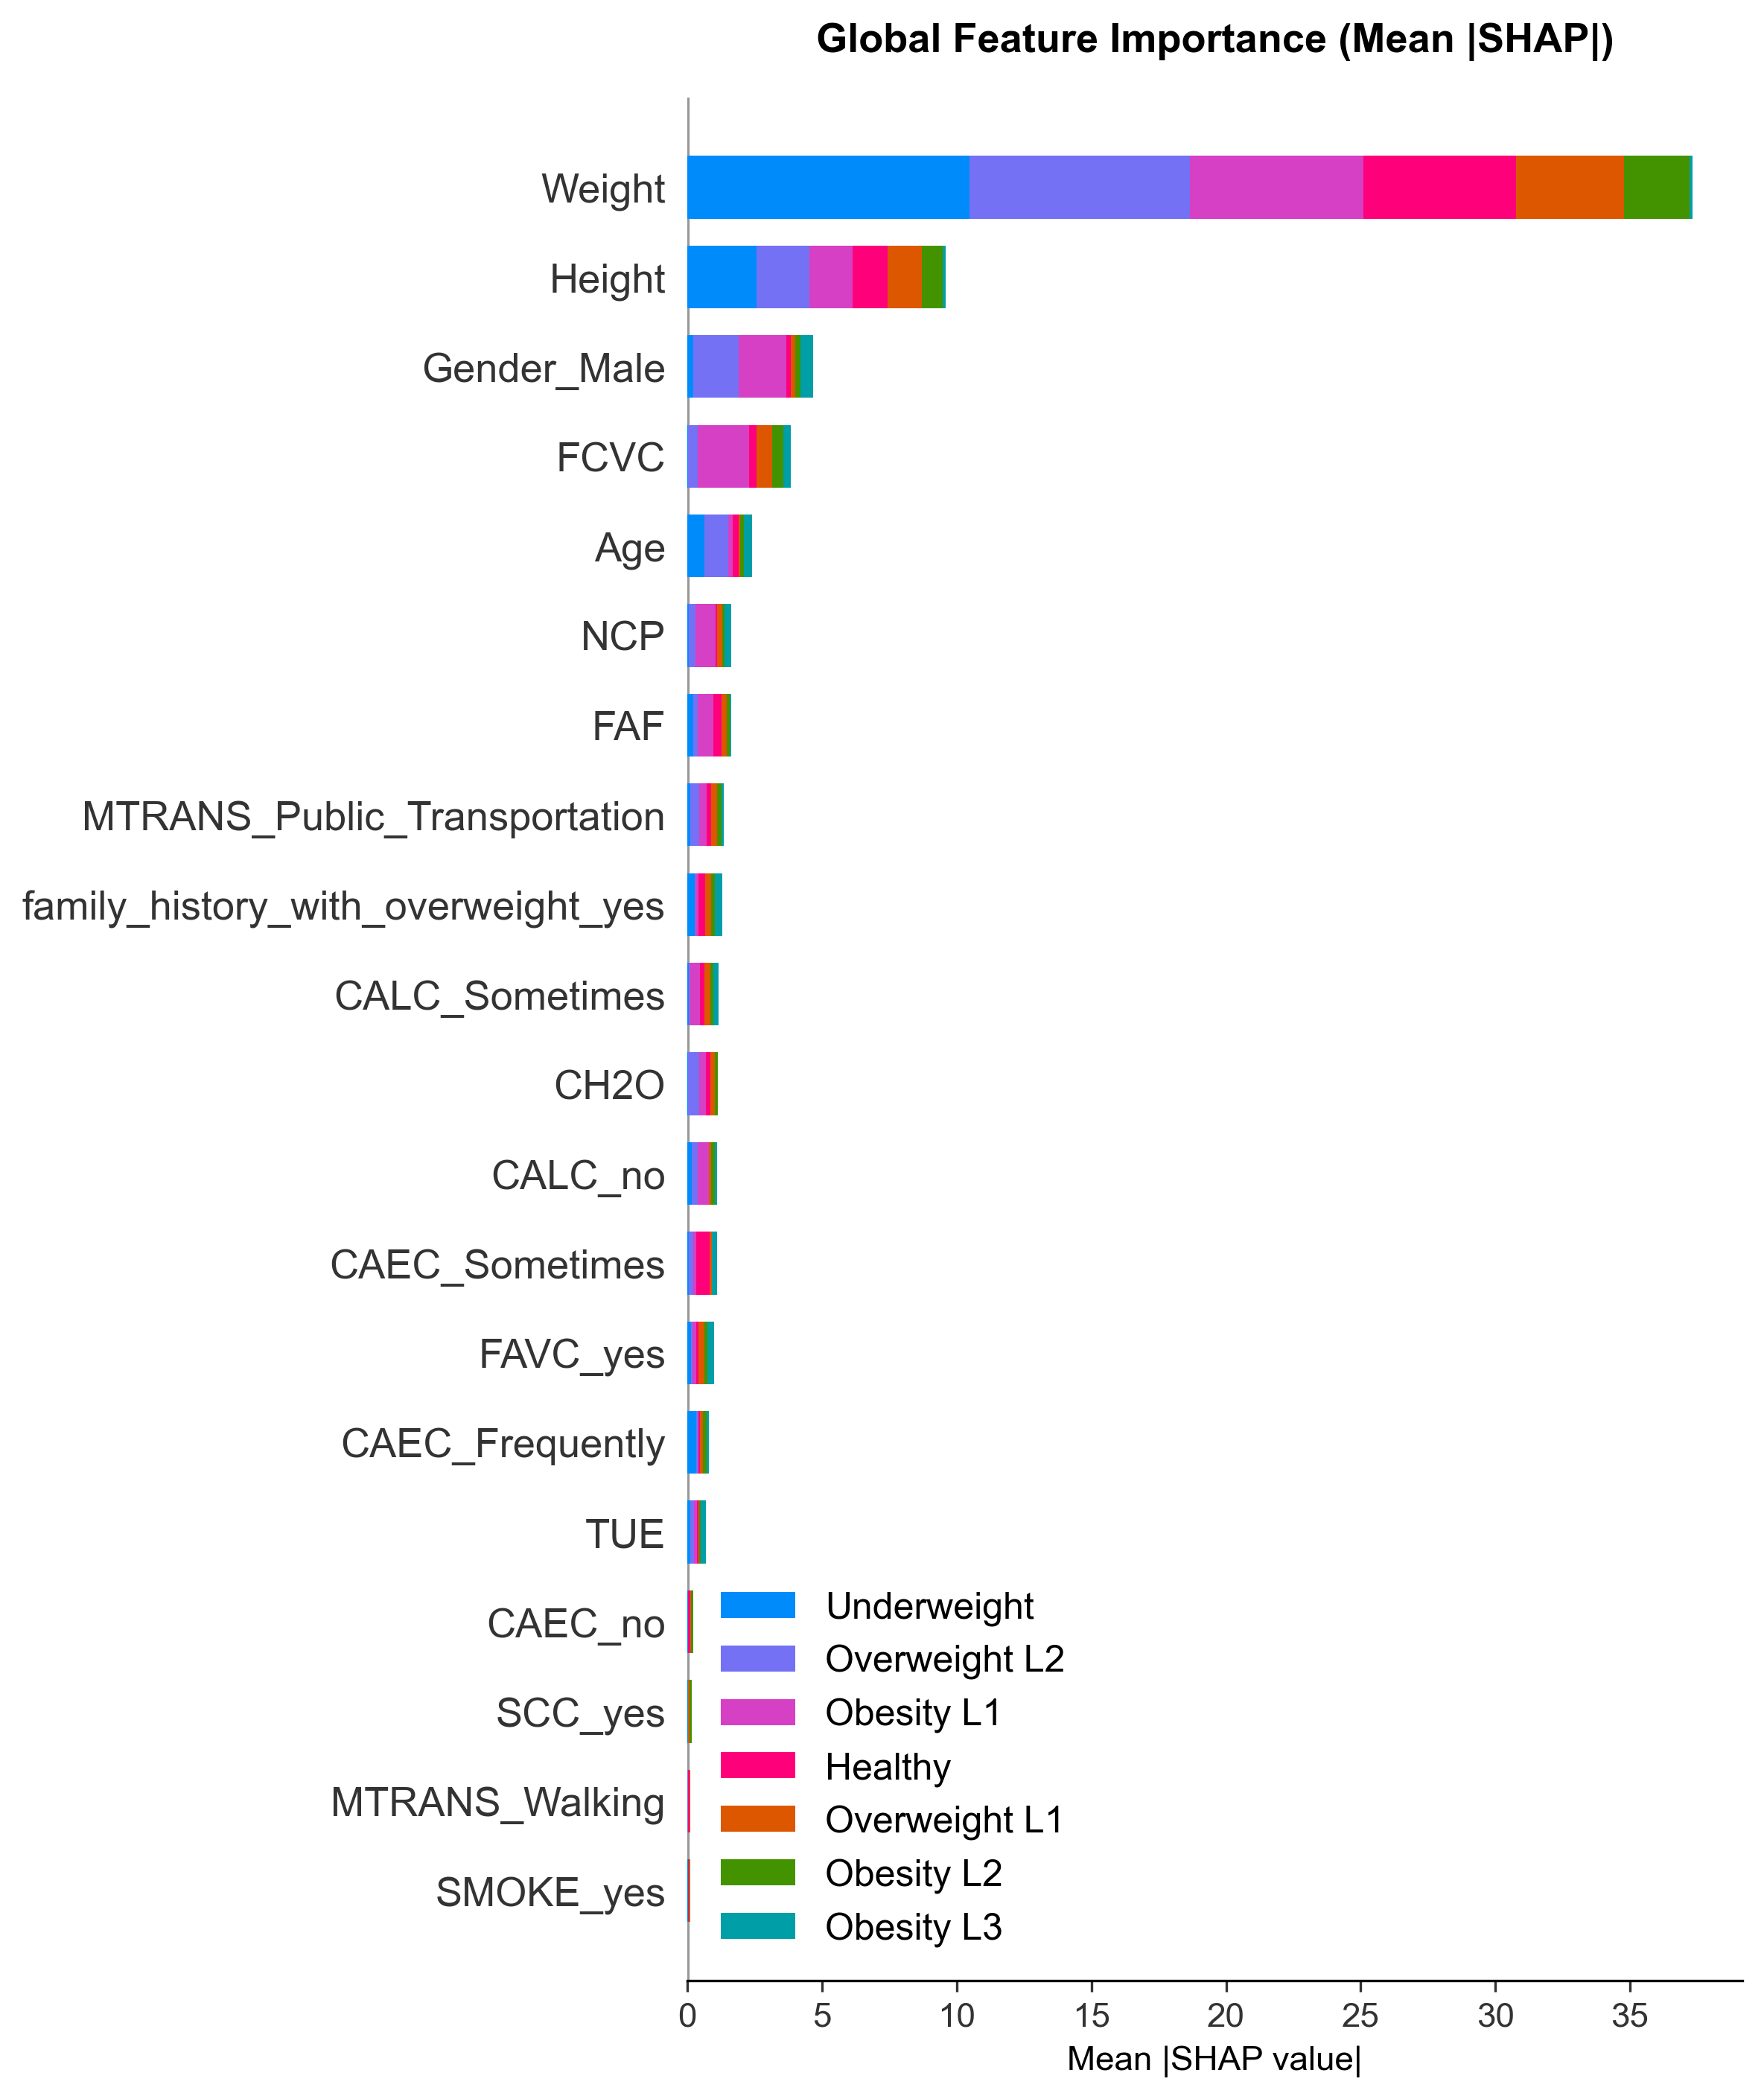

✓ Saved: shap_global_importance_bar.png


In [ ]:
print("\n" + "="*80)
print("GENERATING GLOBAL FEATURE IMPORTANCE PLOTS")
print("="*80)

# Plot 1: Global summary plot (beeswarm) - shows feature importance across all classes
fig, ax = plt.subplots(figsize=(10, 8))
shap.summary_plot(
    shap_values_list, 
    X_test_df,
    feature_names=feature_names,
    class_names=class_names,
    show=False,
    max_display=20
)
plt.title('Global SHAP Summary - All Classes', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('SHAP value', fontsize=11)
plt.tight_layout()
plt.savefig('../images/model1_shap_global_summary.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: shap_global_summary.png")

# Plot 2: Mean absolute SHAP values (bar plot) - overall feature importance
fig, ax = plt.subplots(figsize=(10, 8))
shap.summary_plot(
    shap_values_list,
    X_test_df,
    feature_names=feature_names,
    plot_type="bar",
    class_names=class_names,
    show=False,
    max_display=20
)
plt.title('Global Feature Importance (Mean |SHAP|)', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Mean |SHAP value|', fontsize=11)
plt.tight_layout()
plt.savefig('../images/model1_shap_global_importance_bar.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: shap_global_importance_bar.png")

Judging from the global aggregation of feature importance for all classes, the top 3 most importantfeatures are Weight, Height and Gender_Male.